# Best Practices for Data Visualisation

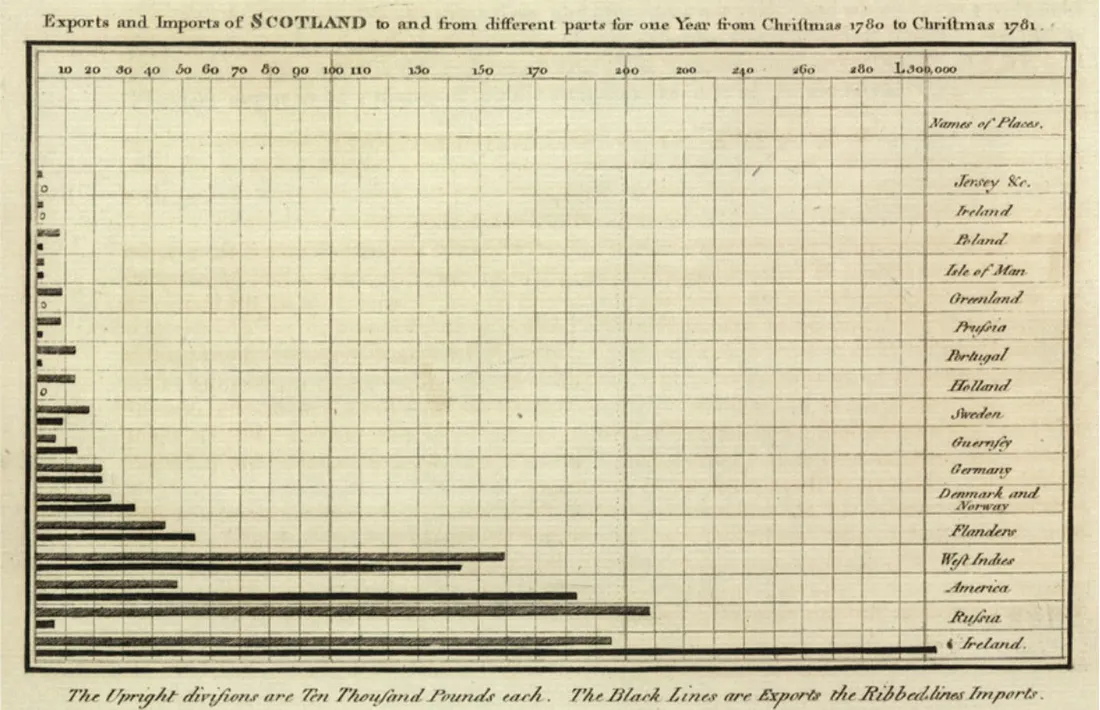

Source: (Krause, Rennie, Tarran, 2024)

## Motivation

Data visualisations can be a very efficient means of identifying patterns in data and conveying a message. The scientific aim of any visualisation is to allow the reader to understand data and extract information:

- intuitively;

- efficiently; and

- accurately.

<div class="alert alert-block alert-warning">
<b>Important:</b> When creating a visualisation, to consider the background of the reader or intended audience (Krause 2013).
</div>

Interpretation is in the eye of the beholder, and a visualisation will only succeed at conveying its message if designed with its audience in mind.

#### A successful data visualisation will

- Grab attention
- Improve access to information
- Increase precision
- Bolster credibility
- Summarise content

<div class="alert alert-block alert-info">
<b>Note:</b> Tables, too, are a way to visualise data or statistics, and can be similarly important components of a publication. A table may in some cases visualise data better than a graphic. For example, five numbers are probably better displayed in a table than in a complex pie chart that uses colours, angles, and possibly shading and more than two dimensions. 
</div>

| **Run-Number** | **Accuracy** |
|:--------------:|:------------:|
|        1       |     65 %     |
|        2       |     63 %     |
|        3       |     69 %     |


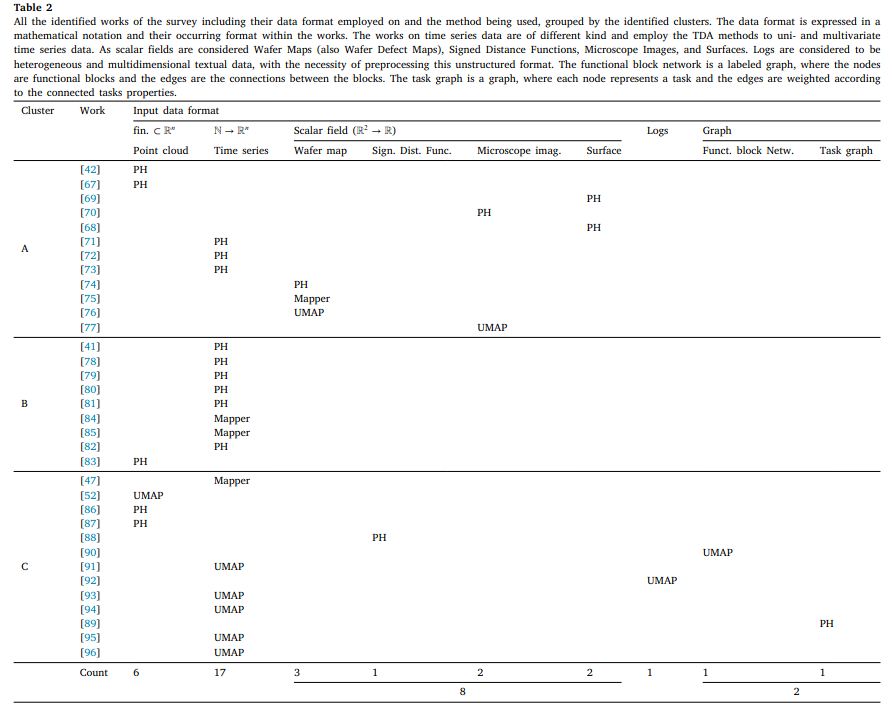

__Source:__ (Uray, Giunti, Kerber, Huber, 2024)

## Brief History


![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Nightingale-mortality.jpg/1280px-Nightingale-mortality.jpg)

"Diagram of the causes of mortality in the army in the East" by Florence Nightingale

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Snow-cholera-map-1.jpg/819px-Snow-cholera-map-1.jpg)

Map of the book "On the Mode of Communication of Cholera" by John Snow, originally published in 1854 by C.F. Cheffins, Lith, Southhampton Buildings, London, England. 

![](https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png)

Charles Minard's 1869 map of “the successive losses in men of the French Army in the Russian campaign 1812–1813”. Source: Wikimedia Commons.

## Elements of Charts

### Layout
The layout (arrangement of multiple panels, facets, or subplots) is highly relevant for efficient comparison. If data on the y-axis are to be compared, a single y-axis with all panels aligned horizontally facilitates comparison, whereas for efficient comparison of x-axis values, panels should be stacked. Matrix layouts (multiple rows and columns in a single figure) should only be used if the data shown in individual panels are not related or space does not permit a single row or a single column (e.g., if there are too many panels to fit on a single row).

![layout](https://royal-statistical-society.github.io/datavisguide/docs/images/principles-layout.png)

### Aspect Ratio
Our visual perception of data in a display must not depend on the choice of x- and y-axes. In many cases, a square figure avoids visual bias. A square figure should be considered in particular if the two axes share a communality such as a measurement before and after some event, observed data vs model-predicted values or, more generally, the same units (such as kg or metres). Generally, a 1:1 aspect ratio (the physical length of 1 measurement unit in the x- and the y-direction) is a good default. If the figure has identical ranges for the x- and the y-axis, a 1:1 aspect ratio yields a square figure.

![aspect ratio](https://royal-statistical-society.github.io/datavisguide/docs/images/principles-aspect-ratio.png)

### Lines

Lines introduce an order, a sequence. 

<div class="alert alert-block alert-warning">
If there is no order, data should not be interconnected by lines. 
</div>

If different line types indicate different groups that have an inherent order, it is helpful if the chosen line styles have an order, too (example: line thickness, dash density, or darkness of colour increases with values from the lowest to the highest group).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

linestyle_str = [('solid', 'solid'), ('dashed', 'dashed'), ('dashdot', 'dashdot'), ('dotted', 'dotted')]

linestyle_tuple = [('loosely dotted', (0, (1, 10))), ('dotted', (0, (1, 1))), ('densely dotted', (0, (1, 1))), ('long dash with offset', (5, (10, 3))),
                   ('loosely dashed', (0, (5, 10))), ('dashed',  (0, (5, 5))), ('densely dashed', (0, (5, 1))), ('loosely dashdotted', (0, (3, 10, 1, 10))),
                   ('dashdotted', (0, (3, 5, 1, 5))), ('densely dashdotted', (0, (3, 1, 1, 1))), ('dashdotdotted', (0, (3, 5, 1, 5, 1, 5))), 
                   ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))), ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

def plot_linestyles(ax, linestyles, title):
    X, Y = np.linspace(0, 100, 10), np.zeros(10)
    yticklabels = []
    for i, (name, linestyle) in enumerate(linestyles):
        ax.plot(X, Y+i, linestyle=linestyle, linewidth=1.5, color='black')
        yticklabels.append(name)
    ax.set_title(title)
    ax.set(ylim=(-0.5, len(linestyles)-0.5), yticks=np.arange(len(linestyles)), yticklabels=yticklabels)
    ax.tick_params(left=False, bottom=False, labelbottom=False)
    ax.spines[:].set_visible(False)
    for i, (name, linestyle) in enumerate(linestyles):
        ax.annotate(repr(linestyle), xy=(0.0, i), xycoords=ax.get_yaxis_transform(), xytext=(-6, -12), textcoords='offset points',
                    color="blue", fontsize=8, ha="right", family="monospace")

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8), height_ratios=[1, 3])
plot_linestyles(ax0, linestyle_str[::-1], title='Named linestyles')
plot_linestyles(ax1, linestyle_tuple[::-1], title='Parametrized linestyles')
plt.tight_layout()
plt.show()

### Points
Point symbols should be chosen such that the visualisation displays the data in a meaningful way. If thousands of data points are to be shown, open circles or smaller filled symbols are better than overlapping filled symbols. If the data are discrete and observations overlay, consider jittering the data gently for a better visualisation.

In [ ]:
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D

text_style = dict(horizontalalignment='right', verticalalignment='center', fontsize=12, fontfamily='monospace')
marker_style = dict(linestyle=':', color='0.8', markersize=10, markerfacecolor="tab:blue", markeredgecolor="tab:blue")

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()

def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]

fig, axs = plt.subplots(ncols=2)
fig.suptitle('Un-filled markers', fontsize=14)
unfilled_markers = [m for m, func in Line2D.markers.items() if func != 'nothing' and m not in Line2D.filled_markers]

for ax, markers in zip(axs, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

fig, axs = plt.subplots(ncols=2)
fig.suptitle('Filled markers', fontsize=14)
for ax, markers in zip(axs, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

### Colors

Colors should serve a purpose such as helping to identify different groups. Colours for pure decoration are discouraged. Tufte pointed out that because “they do have a natural visual hierarchy, varying shades of gray show varying quantities better than color”, and “the shades of gray provide an easily comprehended order to the data measures. This is the key” (Tufte 2001, 154).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cmaps = [('Perceptually Uniform Sequential', ['viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink', 'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', ['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral', 'gist_ncar'])]

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)
    axs[0].set_title(f"{cmap_category} colormaps", fontsize=14)
    for ax, cmap_name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=cmap_name)
        ax.text(-.01, .5, cmap_name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)
    for ax in axs:
        ax.set_axis_off()

for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

### Text

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

fig.suptitle('bold figure suptitle', fontsize=22, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')
ax.axis([0, 10, 0, 10])

ax.text(3, 8, 'boxed italics text in data coords', style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=6)

ax.text(3, 2, 'Unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords', verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes, color='green', fontsize=15)

ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

### Symbols
Symbols should be intuitive (for example, "$+$" for a positive outcome, "$-$" for a negative outcome, "O" for a neutral outcome). In an ideal case, symbols require only a single look at the legend to subsequently focus on the visualisation. 

Symbols such as triangles, circles, and squares do not have an intuitive connotation. However, if there is an order in the data, it might be reflected in the order of the symbols, e.g., the number of vertices (circle, dash, triangle, square, pentagon, etc.).

### Axes

#### Origins and Limits

Axis ranges should generally start at 0 unless there is a good reason for choosing other ranges. If the data do not contain negative values, the axis should not stretch into negative values and in particular not have tick marks at negative values.

If relative changes or ratios are displayed, the corresponding axis should be logarithmic (such that, e.g., 1/4 has the same distance to the reference point, 1, as 4) and symmetric around the point of no change. An auxiliary line at the point of no change can facilitate interpretation. Axis tickmarks and auxiliary grey lines will facilitate reading off values, avoiding wrong linear interpolation by the viewer. Axis tick mark labels should indicate the ratio (e..g, “1/4” instead of 0.25).

If the data displayed as x and as y are comparable, axis limits should be identical and the figure square, such that distances are consistent in the x- and in the y-direction.

In [ ]:
fig, ax = plt.subplots(1, 2)

labels = ["Our Product", "Competitor"]
counts = [220, 210]

ax[0].bar(labels, counts, color='tab:blue', alpha=0.65)
ax[0].set_ylim(206,221)
ax[0].grid(True)
ax[0].set_ylabel("Metric")

ax[1].bar(labels, counts, color='tab:blue', alpha=0.65)
ax[1].grid(True)

plt.show()

#### Linear and Logarithmic Axes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm

# ---
# Data set creation.
np.random.seed(234)
x = pd.DataFrame({
    'x': lognorm(s=0.2, scale=np.exp(2)).rvs(200),
    'y': lognorm(s=0.75, scale=np.exp(0.2)).rvs(200)
})

# Add an outlier manually.
x = x.append({'x': np.quantile(x['x'], 0.8), 'y': x['y'].max() * 1.5}, ignore_index=True)


# ---
# Plotting.

# Scatterplot of y vs x.
fig, ax = plt.subplots(figsize=(8, 6), nrows=2, ncols=2)
sns.scatterplot(data=x, x='x', y='y', ax=ax[0,0])
ax[0,0].axhline(y=1, color='firebrick', linewidth=2)
ax[0,0].set_xlabel('x-variable')
ax[0,0].set_ylabel('Fold-change')

# Logarithmic axes, symmetric range (!):
sns.scatterplot(data=x, x='x', y='y', ax=ax[0,1])
ax[0,1].axhline(y=1, color='firebrick', linewidth=2)
ax[0,1].set_xlabel('x-variable')
ax[0,1].set_ylabel('Fold-change')
ax[0,1].set_yscale('log')   # <- only change

# ---
# Univariate distribution (histogram).
sns.histplot(x['y'], bins=20, color='gray', 
             edgecolor='firebrick', ax=ax[1,0])
ax[1,0].set_xlabel('Fold-change')

# Symmetric range, log scale.
sns.histplot(x['y'], bins=20, color='gray', 
             edgecolor='firebrick', ax=ax[1,1], 
             log_scale=True)  # <- only change
ax[1,1].set_xlabel('Fold-change')
ax[1,1].set_xscale('log')

plt.show()


#### Broken Axes
Sometimes, under special conditions, it may be beneficial to break axes into two or more different parts.

<div class="alert alert-block alert-warning">
    <b>CAUTION</b> This stylistic element needs to be applied with care! Here, the break must be clearly visible and not hidden. Otherwise such a figure may be misinterpreted very easily.
</div>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
pts = np.random.rand(30)*.2
# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between Axes

ax1.plot(pts)
ax2.plot(pts)
ax1.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.show()

#### Axis Labeling

Each Axis needs to have proper labeling.
The labeling must be self-containing, so that the visualization can be interpreted without necessity of further reading a complementary text.

Labeling of physical quanitites shall follow the [SI Standard](https://www.nist.gov/pml/special-publication-811/nist-guide-si-chapter-7-rules-and-style-conventions-expressing-values).


### Legends

Legends should not attract too much attention and certainly not cover up data. They should be placed in the margins of the figure or can be captured in a small text below the figure. 

If legend entries refer to single objects (e.g., one line per group), placing the legend next to the corresponding object makes it easier for the reader to map legend entries to display objects.

__Example:__ The figure below shows that ease of reading can be improved by adding the legend directly into the figure, next to the corresponding data. Note that labels must not overlay and label positions might require adaptation depending on the data.

<div style="margin-left: 10%">
     <img src="https://royal-statistical-society.github.io/datavisguide/docs/images/principles-legends.png" alt="Legend">
    
</div>

## Elements of Tables
Tables can be an efficient means of visualisation, just like graphics – and they also can be misleading or cumbersome to read if not properly presented. Tables should in particular be considered for a small number of data points or if precise numbers are to be shown. For example if numbers need to be overlaid on graphics to aid readability and interpretation (for example, appending digits to the end of the bars in a barchart), one might consider omitting the graphic entirely and displaying the numbers as a table.

Tables have design elements just like graphics:

- Layout
- Digits
- Alignment
- Multiple numbers in cells
- Orientation
- Fonts and colors

## Combining Elements

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# average marks data for 5 consecutive years 
data = [[98, 95,  93, 96,  97], 
        [97, 92,  95, 94,  96], 
        [98, 95,  93, 95,  94], 
        [96, 94,  94, 92,  95], 
        [95, 90,  91, 94,  98]] 
  
rows = ('English', 'Maths', 'Physics', 'Chemistry', 'Biology') 
columns = [x for x in (2015, 2016, 2017, 2018, 2019)] 
  
# Get some pastel shades for the colors 
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows))) 
n_rows = len(data) 
  
index = np.arange(len(columns)) + 0.3
bar_width = 0.4
  
# Initialize the vertical-offset for 
# the line plots. 
y_offset = np.zeros(len(columns)) 
  
# Plot line plots and create text labels  
# for the table 
cell_text = [] 
for row in range(n_rows): 
    plt.plot(index, data[row], color=colors[row]) 
    y_offset = data[row] 
    cell_text.append([x for x in y_offset]) 
  
# Reverse colors and text labels to display 
# the last value at the top. 
colors = colors[::-1] 
cell_text.reverse() 
  
# Add a table at the bottom of the axes 
the_table = plt.table(cellText=cell_text, 
                      rowLabels=rows, 
                      rowColours=colors, 
                      colLabels=columns, 
                      loc='bottom') 
  
# Adjust layout to make room for the table: 
plt.subplots_adjust(left=0.2, bottom=0.2) 
ax = plt.gcf()
  
plt.ylabel("marks") 
plt.xticks([]) 
plt.title('average marks in each consecutive acadmic year') 
  
plt.show() 

Further Example ...

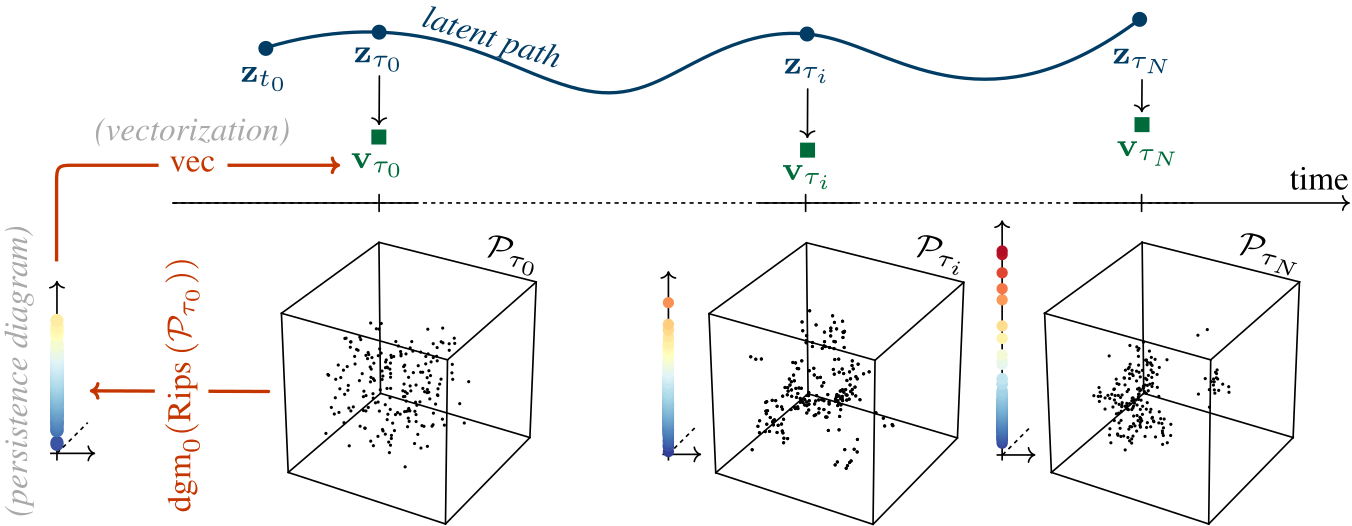

## Choosing a visualisation type

#### Goals and Audience

The process of deciding what type of data visualisation to create begins with a simple question: Why am I doing this? Data visualisations must serve a purpose so all decisions about chart type, design, layout, and more, should flow from a clear understanding of the intended purpose of a graphic.

Christian Hennig, a statistics professor at the University of Bologna, suggests working through the following questions:

> 1. Is the aim of the graph to find something out ("analysis graph"), or to make a point to others?
> 2. What do you want to find out?
> 3. Who is the audience for the graph? (It may be yourself.)

Identifying the target audience at an early stage is crucial, as different groups of people are likely to have different levels of graph literacy depending on their education level, technical expertise, prior exposure to data visualisation formats, and other factors. Design decisions that do not properly account for the needs of the intended audience will fail to achieve their aims.


<div class="alert alert-block alert-warning">
<b>Before any design decisions are made:</b>
     <ul>
      <li>Be clear about the intended purpose of a data visualisation.</li>
      <li>Understand your target audience, including their needs and familiarity with different visualisation types.</li>
    </ul> 
</div>

#### Data

Software tools generally allow users the flexibility to visualise data in whatever format they choose. However, decisions about chart type must be informed either by the kind of data at hand or the data relationship that is of interest. Format choice must then be further guided by audience needs, as previously discussed.
There are a range of online tools to help decide on a visualisation type.

##### Type

- __Type:__ [Data to Viz](https://www.data-to-viz.com/) presents users with a series of decision trees, each leading to different recommended chart formats depending on the type of data selected (numeric, categoric, etc.).
- __Relationship:__ [Visual Vocabulary](https://ft-interactive.github.io/visual-vocabulary/) is a site developed by the data visualisation team at the Financial Times. It allows users to narrow down the choice of chart type based on the data relationship that is “most important in your story”. Relationship options include deviation, correlation, change versus time, ranking, and more.

<div class="alert alert-block alert-warning">
<b>Checklist:</b> 
    <ul>
      <li>Choose a chart type based on either data type or data relationship.</li>
      <li>When selecting from a range of suitable chart types, keep in mind the needs of the target audience and their likely levels of graph literacy.</li>
    </ul>
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> Further general guidance is provided by Few’s Show Me the Numbers (Few 2004) and Robbins’ Creating Better Graphs (Robbins 2006).
</div>

## Wrap Up Exercises

### Exercise 1
What is wrong with this chart and how to fix it? (Just use rough numbers)

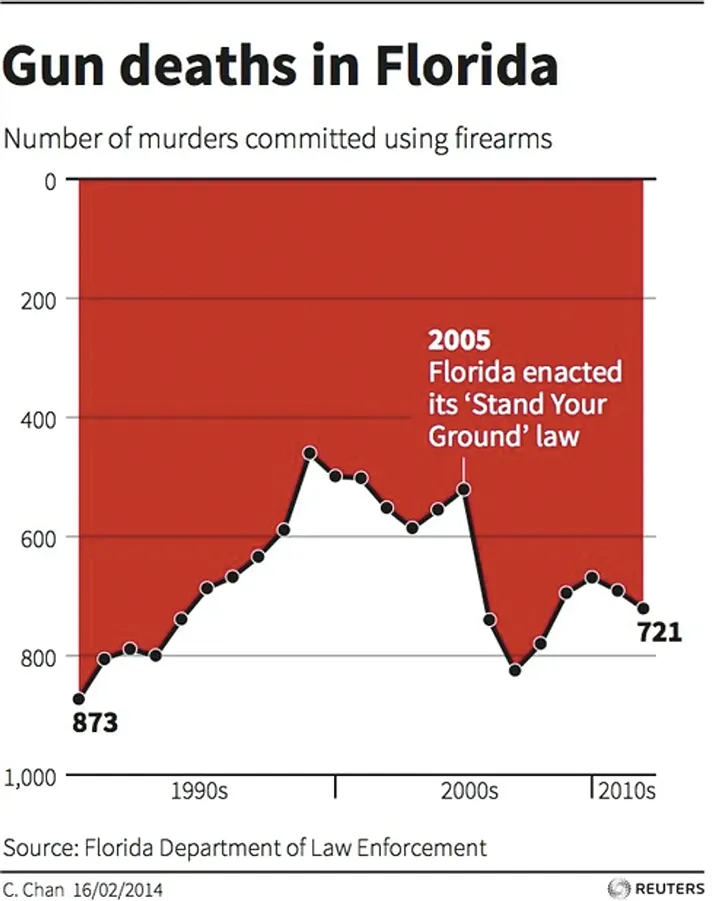

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Exercise 2
What is wrong with these two charts and how to fix it?

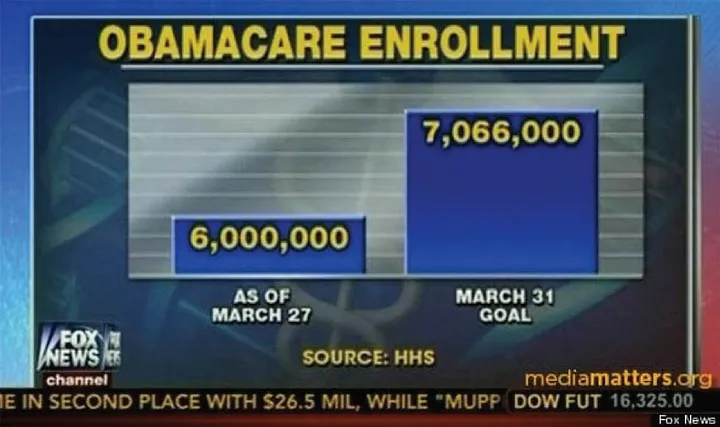
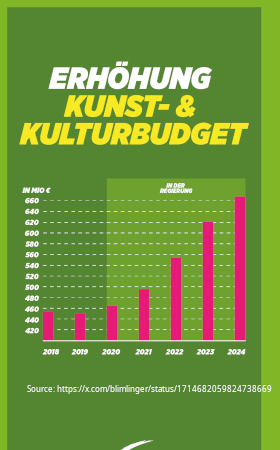

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Exercise 3
What is wrong with these two charts and how to fix it?

![](https://miro.medium.com/v2/resize:fit:720/format:webp/0*ZvHgtX3A3E74oH6k)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Exercise 4
What is wrong with these two charts and how to fix it? 

<div class="alert alert-block alert-info">
<b>Info:</b> No visualization necessary, describe what is wrong.
</div>

![](https://miro.medium.com/v2/resize:fit:720/format:webp/0*pzpzE-NPXEJariMZ)
![](https://cdn.prod.website-files.com/64ccd6239abfeec743815b28/663b80b9149b611afdd01341_DN9eNKC7NrQM328ymYgKLkzaBi1YuaRACAFMM9rr3s2MQrztLGDr9DGTUuxa6NV_85-s60bPfAtgm0ziFJOuGAyvr2GDlCyKMpaqXE9dX7HGyZyNc51cfTzO-G5lA5cFZUQSIQU-PBOUQIUDEkGD2So.png)
![](https://cdn.prod.website-files.com/64ccd6239abfeec743815b28/663b80b9da5f3d0f9947b09f_8_jaY_2ev7bJWoFi1Xb3dDXGrUUPD-J9D6Po8158mcsmDnd5HlhEPQUtUEJAafDy4SkNRHb-WTC8_llVMM7W_tKh4jtGgzuMzjtuSAGHDdEaRzO_WR_2azjwhTrtAZjvMjgM86KRddLzAbeoLzCfoHo.png)
![](https://cdn.prod.website-files.com/64ccd6239abfeec743815b28/663b80b9dad6823d586ed138_DSzDGSFhVq_feSDXHAaPZSFVFdWaiwXxcBz_WmZHdBdlewptJQXi4Una7qgUc7pPr6YxgZzXegxPgn73BXmFrC9fVTz-TJ8TuRaGgtZHhsWecQ2oPiypYO3SElpayLM0X1stbWdiet8QtBHY17k0hVA.png)
![](https://cdn.prod.website-files.com/64ccd6239abfeec743815b28/663b80b96720f52a75e606c8_tIhX4uMuNfbdtlFBsXEpsyeJpUCgrZWAHlbY_41ZVs6hOlmpStJyWaXk3ApBKZuBi4PCIC1PxNgB10xZi575CCY-lwx_fxNUuRSoJ_0u-MVGxvjf1Hb7oyApQzJiJYFWPhmvQDdDVBrfYhZQgTCjTL8.png)

YOUR ANSWER HERE

### Exercise 5
What is wrong with these two charts and how to fix it? Make it better!!

![](https://cdn.prod.website-files.com/64ccd6239abfeec743815b28/663b80b89c7cc6a010af6139__ttJCqG-juiiwhUAZdI6bsCqEt4P-KjUm6gMgrHN0vqPtTrJk5Vtl9QopyjwilD42bmmNFk2kFwALV_W3ImK1dGygz0TYZ-JX19RYdSD5iTSG2Wrs7pQ0WNhOBbB94pQBoxxVcGUt-A-XcbNpDVi2Hc.png)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Exercise 6
What is wrong with this chart and how to fix it? Discuss it!

<div class="alert alert-block alert-info">
<b>Info:</b> No visualization necessary, describe what is wrong.
</div>

![](https://cdn.prod.website-files.com/64ccd6239abfeec743815b28/663b80b826b21261fe399adb_s8SAJgVgf7h-sYL9ktUc7p3TVyFlNru27sZ0srQ1OYH8tfX4gOSWSRv7iiFw_aZiV_u2ksNA7ma4LpS29jXdQGpV7SxmDBukMeNeKs3uYC-h0Qin5SZ_J0ZWbr3sHA25rbsE5IkS_KJW4q9Lse8Zg90.png)

YOUR ANSWER HERE

## Sources

A. Krause. 2013. “Concepts and Principles of Clinical Data Graphics.” In A Picture Is Worth a Thousand Tables: Graphics in Life Sciences. Springer.

A. Krause, Andreas, N. Rennie, and B. Tarran. “Best Practices for Data Visualisation.” Royal Statistical Society, 1 February 2024. https://doi.org/10.5281/zenodo.10600718.

E. R. Tufte. 2001. The Visual Display of Quantitative Information. 2nd ed. Cheshire, CT: Graphics Press. 

M. Uray, B. Giunti, M. Kerber, and S. Huber, “Topological Data Analysis in smart manufacturing: State of the art and future directions,” Journal of Manufacturing Systems, vol. 76, pp. 75–91, Oct. 2024, doi: 10.1016/j.jmsy.2024.07.006.

S. Zeng, F. Graf, M. Uray, S. Huber, and R. Kwitt, “Neural Persistence Dynamics,” Advances in Neural Information Processing Systems, vol. 37, December 2024, doi: 10.48550/arXiv.2405.15732.

